# Testing out fastai

In [1]:
from fastai.vision.all import *

In [2]:
path = '../cv_data/cifar10/train'

In [3]:
files = get_image_files(path)
len(files)

50000

In [4]:
type(files)

fastcore.foundation.L

In [5]:
# Dataloading take 2
cifar10 = '../cv_data/cifar10'

In [6]:
dls = ImageDataLoaders.from_folder(cifar10)

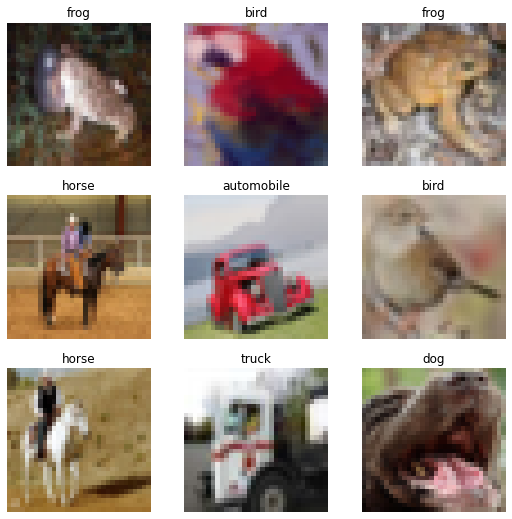

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
#learn.fine_tune(1)

## Add Transforms

In [9]:
from train_classification_lightning import choose_dataset

In [10]:
mean, std, traindir, valdir, num_c = choose_dataset('cifar10')

In [11]:
#cifar_stats = ([*mean],[*std])

In [12]:
#import torchvision.transforms as transforms
#data_transform_normal = transforms.Compose([
#            transforms.Resize((300,300)),
#            #transforms.CenterCrop((100, 100)),
#            transforms.RandomCrop((250, 250), padding=4),
#            transforms.RandomHorizontalFlip(p=0.5),
#            #transforms.RandomRotation(degrees=(-90, 90)),
#            #transforms.RandomVerticalFlip(p=0.5),
#            transforms.ToTensor(),
#            transforms.Normalize(mean, std)
#            ])

In [13]:
item_tfms = [ToTensor, RandomResizedCrop(128, min_scale=0.35)]

In [14]:
item_tfms2 = [ToTensor, Resize(size=(300,300)), 
              RandomCrop(size=(250,250))#, 
              #Dihedral()
             ]

In [15]:
batch_tfms = [Dihedral()]
#batch_tfms = [Dihedral(),Normalize()]


In [16]:
dls = ImageDataLoaders.from_folder(cifar10, train='train', 
                                   valid='test', device=1, 
                                   item_tfms=item_tfms2,
                                  batch_tfms=batch_tfms,
                                  bs=164)

In [17]:
dls.train_ds.items[5:10]

[Path('../cv_data/cifar10/train/bird/20189_bird.png'),
 Path('../cv_data/cifar10/train/bird/31230_bird.png'),
 Path('../cv_data/cifar10/train/bird/13226_bird.png'),
 Path('../cv_data/cifar10/train/bird/8314_bird.png'),
 Path('../cv_data/cifar10/train/bird/12191_bird.png')]

In [18]:
type(dls)

fastai.data.core.DataLoaders

In [19]:
# call to resnet18 goes to the torchvision library so it is same as the one we have in 
# 
learn = cnn_learner(dls, resnet18, pretrained=False, 
                    metrics=[accuracy, top_k_accuracy])
#learn.fine_tune(1)

In [27]:
learn.fit(n_epoch=50)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,1.835039,1.938373,0.367400,0.868000,01:42
1,1.513667,1.272368,0.544600,0.944800,01:53
2,1.243599,1.508175,0.606100,0.953300,01:57
3,1.053734,1.016378,0.705100,0.976600,02:06
4,0.938526,0.732988,0.744500,0.981900,02:08
5,0.849213,0.642656,0.776800,0.985100,02:02
6,0.765467,0.584992,0.800100,0.989000,02:07
7,0.720816,0.608127,0.780000,0.991400,02:09
8,0.659474,0.523544,0.815900,0.990400,02:07
9,0.634465,0.528767,0.816700,0.991600,02:01


# Test Timm Model

https://rwightman.github.io/pytorch-image-models/models/

In [20]:
import timm
from pprint import pprint
model_names = timm.list_models(pretrained=False)
pprint(model_names)

['adv_inception_v3',
 'cspdarknet53',
 'cspdarknet53_iabn',
 'cspresnet50',
 'cspresnet50d',
 'cspresnet50w',
 'cspresnext50',
 'cspresnext50_iabn',
 'darknet53',
 'densenet121',
 'densenet121d',
 'densenet161',
 'densenet169',
 'densenet201',
 'densenet264',
 'densenet264d_iabn',
 'densenetblur121d',
 'dla34',
 'dla46_c',
 'dla46x_c',
 'dla60',
 'dla60_res2net',
 'dla60_res2next',
 'dla60x',
 'dla60x_c',
 'dla102',
 'dla102x',
 'dla102x2',
 'dla169',
 'dpn68',
 'dpn68b',
 'dpn92',
 'dpn98',
 'dpn107',
 'dpn131',
 'eca_vovnet39b',
 'ecaresnet18',
 'ecaresnet50',
 'ecaresnet50d',
 'ecaresnet50d_pruned',
 'ecaresnet101d',
 'ecaresnet101d_pruned',
 'ecaresnetlight',
 'ecaresnext26tn_32x4d',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b2a',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b3a',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',


In [29]:
efficient_net_compare = timm.create_model('efficientnet_b0', pretrained=False, num_classes=10)

In [31]:
print(efficient_net_compare)

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequenti

In [34]:
# See first layer
from fastai.vision.learner import _get_first_layer
c,p,n = _get_first_layer(efficient_net_compare)
# c is the layer
# p is the whole network
# n is the name of the layer

In [35]:
print(c)

Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)


In [38]:
print(n)

conv_stem


In [39]:
from fastai.vision.learner import _update_first_layer

# from https://walkwithfastai.com/vision.external.timm
def create_timm_body(arch:str, pretrained=True, cut=None, n_in=3):
    "Creates a body from any model in the `timm` library."
    model = timm.create_model(arch, pretrained=pretrained, num_classes=0, global_pool='')
    _update_first_layer(model, n_in, pretrained)
    if cut is None:
        ll = list(enumerate(model.children()))
        cut = next(i for i,o in reversed(ll) if has_pool_type(o))
    if isinstance(cut, int): return nn.Sequential(*list(model.children())[:cut])
    elif callable(cut): return cut(model)
    else: raise NamedError("cut must be either integer or function")


In [40]:
body = create_timm_body('efficientnet_b0')

In [41]:
print(body)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): SiLU(inplace=True)
  (3): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0): Inver

In [46]:
def create_timm_model(arch:str, n_out, cut=None, pretrained=False, n_in=3, init=nn.init.kaiming_normal_, custom_head=None,
                     concat_pool=True, **kwargs):
    "Create custom architecture using `arch`, `n_in` and `n_out` from the `timm` library"
    body = create_timm_body(arch, pretrained, None, n_in)
    if custom_head is None:
        nf = num_features_model(nn.Sequential(*body.children())) * (2 if concat_pool else 1)
        head = create_head(nf, n_out, concat_pool=concat_pool, **kwargs)
    else: head = custom_head
    model = nn.Sequential(body, head)
    if init is not None: apply_init(model[1], init)
    return model, body, head

In [43]:
get_c(dls)

10

In [ ]:
# create timm model is broken and not calculating right

In [58]:
validate_model_processing, body, head = create_timm_model('efficientnet_b0', 10, concat_pool=False)

In [59]:
num_features_model(nn.Sequential(*body.children()))

1280

In [60]:
head

Sequential(
  (0): AdaptiveAvgPool2d(output_size=1)
  (1): Flatten(full=False)
  (2): BatchNorm1d(1280, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1280, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=10, bias=False)
)

In [63]:
def timm_learner(dls, arch:str, loss_func=None, pretrained=False, cut=None, splitter=None,
                y_range=None, config=None, n_out=None, normalize=True, **kwargs):
    "Build a convnet style learner from `dls` and `arch` using the `timm` library"
    if config is None: config = {}
    if n_out is None: n_out = get_c(dls)
    assert n_out, "`n_out` is not defined, and could not be inferred from data, set `dls.c` or pass `n_out`"
    if y_range is None and 'y_range' in config: y_range = config.pop('y_range')
    model, body, head = create_timm_model(arch, n_out, default_split, pretrained, y_range=y_range, 
                                          concat_pool=False, **config)
    learn = Learner(dls, model, loss_func=loss_func, splitter=default_split, **kwargs)
    if pretrained: learn.freeze()
    return learn

concat_pool is resulting in incorrect number of layers. Setting this to false lets the head be computed properly. We need to try and see what this was set the way that it was?

In [69]:
dls = ImageDataLoaders.from_folder(cifar10, train='train', 
                                   valid='test', device=1, 
                                   item_tfms=item_tfms2,
                                  batch_tfms=batch_tfms,
                                  bs=32)

In [70]:
learn2 = timm_learner(dls, 'efficientnet_b0', pretrained=False,
                    metrics=[accuracy, top_k_accuracy])

In [28]:
learn2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
    (3): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): SiLU(inplace=True)
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity(

In [ ]:
learn2.fit(n_epoch=50)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
